In [2]:
#Dependencies and Setup

import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as st 
import matplotlib.ticker as ticker
import numpy as np

#Import the CSVs

country_path = "archive/co2_emissions_kt_by_country.csv"
population_path = "archive/population_by_country.csv"

country_data = pd.read_csv(country_path)
population_data = pd.read_csv(population_path)

country_data.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [3]:
population = population_data.sort_values(["country_code"])
population.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,54608.0
33,ABW,Aruba,1993,72360.0
34,ABW,Aruba,1994,74710.0
35,ABW,Aruba,1995,77050.0
36,ABW,Aruba,1996,79417.0


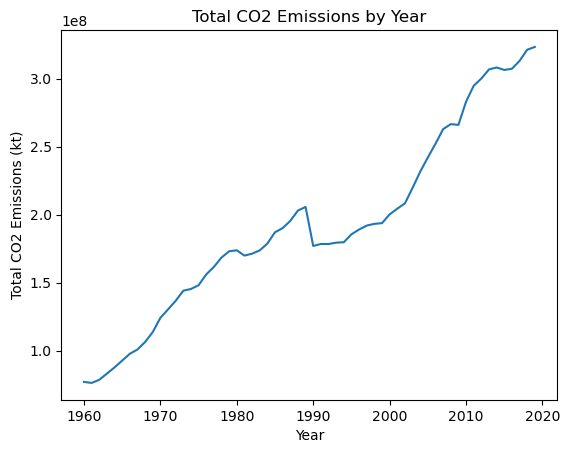

In [4]:
total_country_emissions_per_year = country_data.groupby("year")["value"].sum()
total_country_emissions_per_year

#Creating a line plot to visulize the total data set grouped by year

country_x_axis = total_country_emissions_per_year.index
country_y_axis = total_country_emissions_per_year.values

plt.plot(country_x_axis,country_y_axis)

plt.xlabel("Year")
plt.ylabel("Total CO2 Emissions (kt)")
plt.title("Total CO2 Emissions by Year")

plt.show()

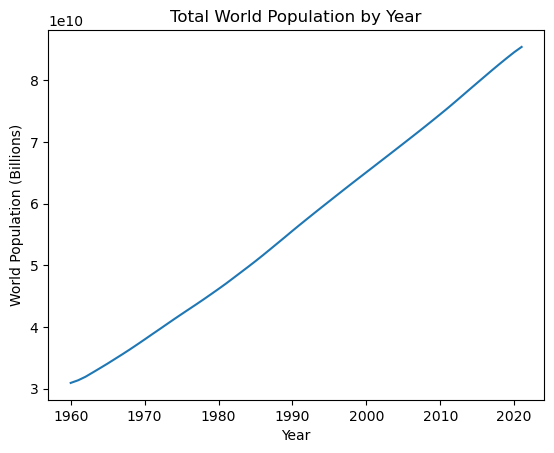

In [5]:
population_by_year = population_data.groupby("year")["value"].sum()
population_by_year

#Creating a line plot to visulize the total data set grouped by year

pop_x_axis = population_by_year.index
pop_y_axis = population_by_year.values

plt.plot(pop_x_axis,pop_y_axis)

plt.xlabel("Year")
plt.ylabel("World Population (Billions)")
plt.title("Total World Population by Year")

plt.show()

In [6]:
#merge the dfs to create a new one 
country_results_merged_df = pd.merge(population_data, country_data, how = "left", on = ["country_code", "year", "country_name"])

#rename the columns
country_results_merged_df.rename(columns = 
    {
    "value_x": "population",
    "value_y": "emissions (kt)"
    }, inplace = True)

country_results_merged_df.head()


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675
1,ABW,Aruba,1961,55811.0,11576.719
2,ABW,Aruba,1962,56682.0,12713.489
3,ABW,Aruba,1963,57475.0,12178.107
4,ABW,Aruba,1964,58178.0,11840.743


In [7]:
#Getting rid of all NaN columns
print(country_results_merged_df[country_results_merged_df.isnull().any(axis=1)])

country_results_merged_df = country_results_merged_df.dropna(how = "any")

country_results_merged_df.head()

      country_code country_name  year  population  emissions (kt)
57             ABW        Aruba  2017    105439.0             NaN
58             ABW        Aruba  2018    105962.0             NaN
59             ABW        Aruba  2019    106442.0             NaN
60             ABW        Aruba  2020    106585.0             NaN
61             ABW        Aruba  2021    106537.0             NaN
...            ...          ...   ...         ...             ...
16339          ZWE     Zimbabwe  1961   3925952.0             NaN
16340          ZWE     Zimbabwe  1962   4049778.0             NaN
16341          ZWE     Zimbabwe  1963   4177931.0             NaN
16398          ZWE     Zimbabwe  2020  15669666.0             NaN
16399          ZWE     Zimbabwe  2021  15993524.0             NaN

[2477 rows x 5 columns]


,country_code,country_name,year,population,emissions (kt)
0,ABW,Aruba,1960,54608.0,11092.675
1,ABW,Aruba,1961,55811.0,11576.719
2,ABW,Aruba,1962,56682.0,12713.489
3,ABW,Aruba,1963,57475.0,12178.107
4,ABW,Aruba,1964,58178.0,11840.743


In [7]:
country_results_merged_df['emissions (tons)'] = country_results_merged_df['emissions (kt)'] * 1000
country_results_merged_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons)
0,ABW,Aruba,1960,54608.0,11092.675,11092675.0
1,ABW,Aruba,1961,55811.0,11576.719,11576719.0
2,ABW,Aruba,1962,56682.0,12713.489,12713489.0
3,ABW,Aruba,1963,57475.0,12178.107,12178107.0
4,ABW,Aruba,1964,58178.0,11840.743,11840743.0


In [8]:
country_results_merged_df['emissions per capita (t)'] = country_results_merged_df['emissions (tons)'] / country_results_merged_df['population']
country_results_merged_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
0,ABW,Aruba,1960,54608.0,11092.675,11092675.0,203.132783
1,ABW,Aruba,1961,55811.0,11576.719,11576719.0,207.427192
2,ABW,Aruba,1962,56682.0,12713.489,12713489.0,224.294997
3,ABW,Aruba,1963,57475.0,12178.107,12178107.0,211.885289
4,ABW,Aruba,1964,58178.0,11840.743,11840743.0,203.526127


# formatting turns everything into strings

In [9]:

#Formatting the columns 
country_results_merged_df["population"] = country_results_merged_df["population"].map("{:,.0f}".format)

country_results_merged_df["emissions (kt)"] = country_results_merged_df["emissions (kt)"].map("{:,.4f}".format)
country_results_merged_df["emissions per capita (t)"] = country_results_merged_df["emissions per capita (t)"].map("{:,.4f}".format)

#Resets the index since we drop columns
country_results_merged_df.reset_index(drop = True)

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
0,ABW,Aruba,1960,"54,608","11,092.6750",1.109268e+07,203.1328
1,ABW,Aruba,1961,"55,811","11,576.7190",1.157672e+07,207.4272
2,ABW,Aruba,1962,"56,682","12,713.4890",1.271349e+07,224.2950
3,ABW,Aruba,1963,"57,475","12,178.1070",1.217811e+07,211.8853
4,ABW,Aruba,1964,"58,178","11,840.7430",1.184074e+07,203.5261
...,...,...,...,...,...,...,...
13918,ZWE,Zimbabwe,2015,"14,154,937","12,430.0003",1.243000e+07,0.8781
13919,ZWE,Zimbabwe,2016,"14,452,704","11,020.0005",1.102000e+07,0.7625
13920,ZWE,Zimbabwe,2017,"14,751,101","10,340.0002",1.034000e+07,0.7010
13921,ZWE,Zimbabwe,2018,"15,052,184","12,380.0001",1.238000e+07,0.8225


In [10]:
sorted_df = country_results_merged_df.sort_values("emissions per capita (t)", ascending=True)
sorted_df.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
12750,SEN,Senegal,1968,"4,117,659",-80.6740,-80674.0,-0.0196
14634,TLS,Timor-Leste,1992,"783,705",0.0000,0.0,0.0000
14637,TLS,Timor-Leste,1995,"819,226",0.0000,0.0,0.0000
14639,TLS,Timor-Leste,1997,"843,341",0.0000,0.0,0.0000
14640,TLS,Timor-Leste,1998,"855,409",0.0000,0.0,0.0000


In [11]:
sorted2019 = sorted_df.loc[sorted_df["year"] == 2019]
sorted2019_ascending = sorted2019.sort_values("emissions per capita (t)", ascending=False)
sorted2019_ascending.drop([5949,12243], axis =0, inplace= True)
sorted2019_ascending.head()

,country_code,country_name,year,population,emissions (kt),emissions (tons),emissions per capita (t)
3407,CZE,Czechia,2019,"10,671,870","96,290.0009",9.629000e+07,9.0228
8181,LBY,Libya,2019,"6,569,088","56,799.9992",5.680000e+07,8.6466
7375,JPN,Japan,2019,"126,633,000","1,081,569.9463",1.081570e+09,8.5410
11219,OED,OECD members,2019,"1,362,922,537","11,610,640.1645",1.161064e+10,8.5189
10909,NLD,Netherlands,2019,"17,344,874","146,339.9963",1.463400e+08,8.4371


country_name
Burundi        0.0606
Czechia        9.0228
Japan           8.541
Kenya          0.4373
Netherlands    8.4371
Rwanda         0.1036
Name: emissions per capita (t), dtype: object


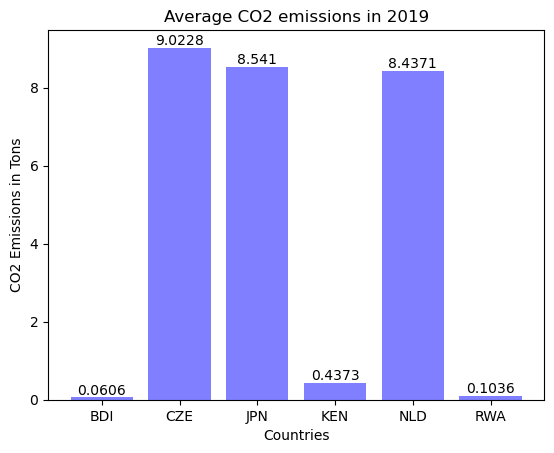

In [12]:
countries_wewant = ['BDI', 'CZE', 'JPN', 'KEN', 'NLD', 'RWA']
countriesofinterest = sorted2019.loc[sorted2019['country_code'].isin(countries_wewant)]
countries2019 = countriesofinterest.groupby(['country_name'])['emissions per capita (t)'].mean()
print(countries2019)

emissions_xaxis = countries_wewant
emissions_yaxis = countries2019
plt.bar(emissions_xaxis, emissions_yaxis, color='b', alpha=0.5, align='center')

for i, v in enumerate(emissions_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('Average CO2 emissions in 2019')
plt.xlabel('Countries')
plt.ylabel('CO2 Emissions in Tons')

plt.show()



In [ ]:
# # Single country df
# czechia_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Czechia']

# # First plot, left hand side
# czechia_tickspacing_y1 = 5
# czechia_tickspacing_y2 = 5
# fig, ax1 = plt.subplots()
# ax1.bar(czechia_data['year'], czechia_data['population'], color='blue')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Population (millions)', color='blue')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(czechia_tickspacing_y1))

# # Second plot, right hand side
# ax2 = ax1.twinx()
# ax2.plot(czechia_data['year'], czechia_data['emissions per capita (t)'], color='red')
# ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(czechia_tickspacing_y2))

# plt.show()

In [ ]:
# # Single country df
# japan_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Japan']

# # First plot, left hand side
# japan_tickspacing_y1 = 5
# japan_tickspacing_y2 = 5
# fig, ax1 = plt.subplots()
# ax1.bar(japan_data['year'], japan_data['population'], color='blue')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Population (millions)', color='blue')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(japan_tickspacing_y1))

# # Second plot, right hand side
# ax2 = ax1.twinx()
# ax2.plot(japan_data['year'], japan_data['emissions per capita (t)'], color='red')
# ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(japan_tickspacing_y2))

# plt.show()

In [ ]:
# # Single country df
# burundi_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Burundi']

# # First plot, left hand side
# burundi_tickspacing_y1 = 5
# burundi_tickspacing_y2 = 5
# fig, ax1 = plt.subplots()
# ax1.bar(burundi_data['year'], burundi_data['population'], color='blue')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Population (millions)', color='blue')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(burundi_tickspacing_y1))

# # Second plot, right hand side
# ax2 = ax1.twinx()
# ax2.plot(burundi_data['year'], burundi_data['emissions per capita (t)'], color='red')
# ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(burundi_tickspacing_y2))

# plt.show()

In [ ]:
# # Single country df
# kenya_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Kenya']

# # First plot, left hand side
# kenya_tickspacing_y1 = 5
# kenya_tickspacing_y2 = 5
# fig, ax1 = plt.subplots()
# ax1.bar(kenya_data['year'], kenya_data['population'], color='blue')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Population (millions)', color='blue')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(kenya_tickspacing_y1))

# # Second plot, right hand side
# ax2 = ax1.twinx()
# ax2.plot(kenya_data['year'], kenya_data['emissions per capita (t)'], color='red')
# ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(kenya_tickspacing_y2))

# plt.show()

In [15]:
# # Single country df
# netherlands_data = country_results_merged_df.loc[country_results_merged_df['country_name'] =='Netherlands'].sort_values('year')

# # First plot, left hand side
# netherlands_tickspacing_y1 = 5
# netherlands_tickspacing_y2 = 5
# fig, ax1 = plt.subplots()
# ax1.bar(netherlands_data['year'], netherlands_data['population'], color='blue')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Population (millions)', color='blue')
# ax1.yaxis.set_major_locator(ticker.MultipleLocator(netherlands_tickspacing_y1))

# # Second plot, right hand side
# netherlands_data_sorted = netherlands_data.sort_values('emissions per capita (t)')
# ax2 = ax1.twinx()
# ax2.plot(netherlands_data['year'], netherlands_data_sorted['emissions per capita (t)'], color='red')
# ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
# ax2.yaxis.set_major_locator(ticker.MultipleLocator(netherlands_tickspacing_y2))

# plt.show()

In [ ]:
# Single country df
# rwanda_data = country_results_merged_df.loc[country_results_merged_df['country_name'] == 'Rwanda'].sort_values('year')
# rwanda_data['population'] = rwanda_data['population'].str.replace(',', '').astype(int)

# # # First plot, left hand side
# rwanda_tickspacing_y1 = 5
# rwanda_tickspacing_y2 = 5
# rwanda_data_sorted_population = rwanda_data.sort_values('population')
# fig, ax1 = plt.subplots()

# ax1.plot(rwanda_data_sorted_population['year'], rwanda_data_sorted_population['population'], color='blue')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Population (millions)', color='blue')
# # ax1.yaxis.set_major_locator(ticker.MultipleLocator(rwanda_tickspacing_y1))

# # # Second plot, right hand side
# rwanda_data_sorted_emissions = rwanda_data.sort_values('emissions per capita (t)')
# ax2 = ax1.twinx()
# ax2.bar(rwanda_data_sorted_emissions['year'], rwanda_data_sorted_emissions['emissions per capita (t)'], color='red')
# ax2.set_ylabel('CO2 Emissions Per Capita (t)', color='red')
# # ax2.yaxis.set_major_locator(ticker.MultipleLocator(rwanda_tickspacing_y2))

# plt.show()

In [ ]:
# rwanda_data_sorted_population = rwanda_data.sort_values('population')
# rwanda_data_sorted_population
# rwanda_data['population'] = rwanda_data['population'].str.replace(',', '').astype(int)
# rwanda_data
# print(rwanda_data['population'].dtype)


In [13]:
samples_df = pd.read_csv('samples.csv', delimiter=';', names=['GEMS Station #', 'Date of Sample', 'Time of Sample', 'Depth of Sample',
                                                              'Parameter Tested', 'Analysis Method', 'Value Flags', 'Result', 'Unit', 'Data Quality'])
samples_df['Country Code'] = samples_df['GEMS Station #'].str[:3]
samples_df['GEMS #'] = samples_df['GEMS Station #'].str[3:]

samples_columns = samples_df.drop(['GEMS Station #', 'Value Flags', 'Data Quality'], axis=1)
samples_columns.head()

C:\Users\jraem\AppData\Local\Temp\ipykernel_19112\932155624.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  samples_df = pd.read_csv('samples.csv', delimiter=';', names=['GEMS Station #', 'Date of Sample', 'Time of Sample', 'Depth of Sample',


,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
0,2016-04-29,00:00,5.88,pH,pH-POT-insitu,6.770,---,BDI,00002
1,2016-04-29,00:00,5.88,TSS,TSS-G,134.000,mg/l,BDI,00002
2,2016-04-29,00:00,5.88,NO2N,COL-AZO,0.036,mg/l,BDI,00002
3,2016-04-29,00:00,5.88,EC,EC-CND-FLD,51.000,µS/cm,BDI,00002
4,2016-04-29,00:00,5.88,TN,COL-AZO-Cd-PS,1.400,mg/l,BDI,00002


In [14]:
ph_columns = samples_columns.loc[samples_columns['Parameter Tested'] == 'pH']
ph_columns.head()

,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
0,2016-04-29,00:00,5.88,pH,pH-POT-insitu,6.77,---,BDI,00002
15,2016-04-27,00:00,2.03,pH,pH-POT-insitu,7.40,---,BDI,00003
39,2016-04-26,00:00,2.28,pH,pH-POT-insitu,7.20,---,BDI,00004
47,2016-04-27,00:00,3.30,pH,pH-POT-insitu,6.90,---,BDI,00005
74,2016-04-27,00:00,0.70,pH,pH-POT-insitu,6.50,---,BDI,00006


Country Code
BDI    6.95
JPN    7.68
KEN    7.74
NLD    9.63
RWA    7.55
Name: Result, dtype: float64


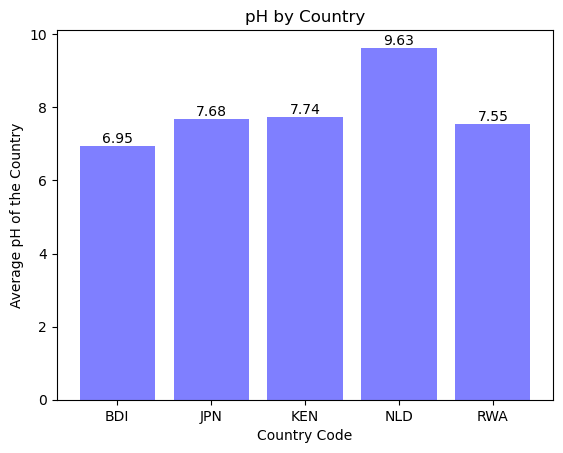

In [15]:
countries = ph_columns['Country Code'].unique()
average_ph = ph_columns.groupby(['Country Code'])['Result'].mean().round(2)
print(average_ph)

# print(countries)
# print(average_ph)

plt.bar(countries, average_ph, color='b', alpha=0.5, align="center")

for i, v in enumerate(average_ph):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.title('pH by Country')
plt.xlabel('Country Code')
plt.ylabel('Average pH of the Country')
plt.show()

In [16]:
samples_pollutants = samples_columns.loc[samples_columns['Parameter Tested'] != 'pH']
samples_pollutants.head()

,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
1,2016-04-29,00:00,5.88,TSS,TSS-G,134.000,mg/l,BDI,00002
2,2016-04-29,00:00,5.88,NO2N,COL-AZO,0.036,mg/l,BDI,00002
3,2016-04-29,00:00,5.88,EC,EC-CND-FLD,51.000,µS/cm,BDI,00002
4,2016-04-29,00:00,5.88,TN,COL-AZO-Cd-PS,1.400,mg/l,BDI,00002
5,2016-04-29,00:00,5.88,NH4N,COL-PHE,0.280,mg/l,BDI,00002


In [17]:
average_pollutants = samples_pollutants.groupby(['Country Code'])['Result'].mean()
average_pollutants_df = pd.DataFrame(average_pollutants)
print(average_pollutants_df)

remove_nld = average_pollutants_df[average_pollutants_df.index != 'NLD']
print(remove_nld)


                    Result
Country Code              
BDI           3.841661e+01
CZE           2.374538e-02
JPN           1.806061e+02
KEN           5.252312e+01
NLD           5.700160e+06
RWA           7.258916e+01
                  Result
Country Code            
BDI            38.416614
CZE             0.023745
JPN           180.606109
KEN            52.523120
RWA            72.589159


['BDI', 'CZE', 'JPN', 'KEN', 'RWA']
[3.8420e+01 2.0000e-02 1.8061e+02 5.2520e+01 7.2590e+01]


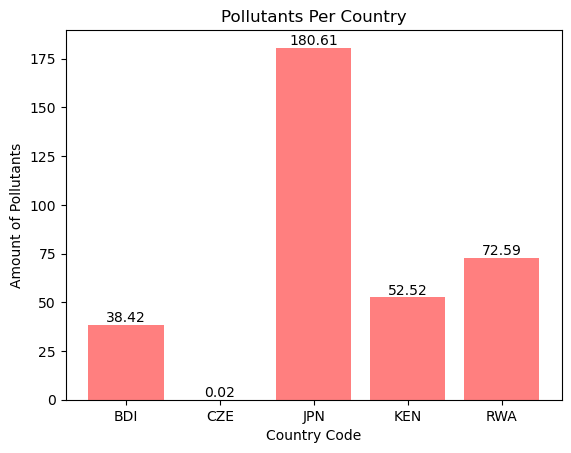

In [18]:
pol_yaxis_values = remove_nld['Result'].values
pol_yaxis = pol_yaxis_values.round(2)
pol_xaxis = remove_nld.index.to_list()
print(pol_xaxis)
print(pol_yaxis)

plt.bar(pol_xaxis, pol_yaxis, color='r', alpha=0.5, align="center")

for i, v in enumerate(pol_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Amount of Pollutants')
plt.title('Pollutants Per Country')

plt.show()

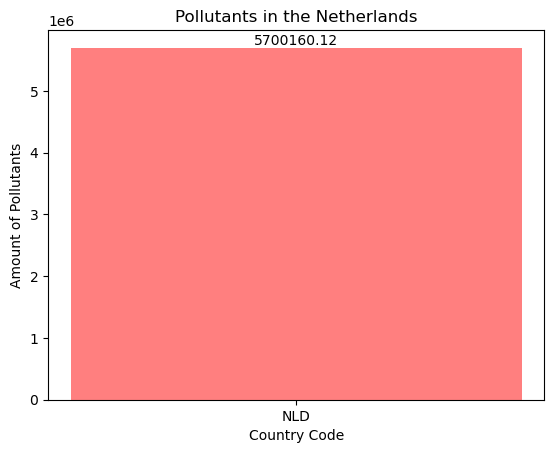

In [19]:
nld_poll = average_pollutants_df[average_pollutants_df.index == 'NLD']

nld_xaxis = nld_poll.index.to_list()
nld_yaxis = nld_poll['Result'].round(2)

for i, v in enumerate(nld_yaxis):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Amount of Pollutants')
plt.title('Pollutants in the Netherlands')

plt.bar(nld_xaxis, nld_yaxis, color='r', alpha=0.5, align='center')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

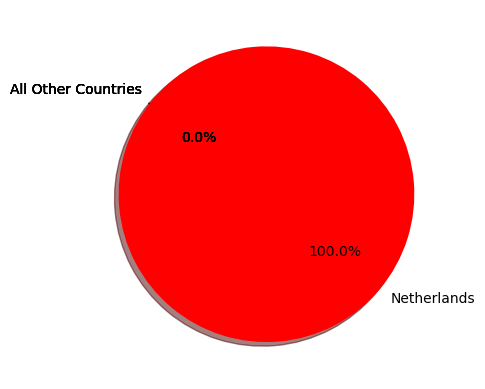

In [20]:
labels_pol = ["All Other Countries", "All Other Countries", "All Other Countries", "All Other Countries", "Netherlands", "All Other Countries"]
colors_pol = ["lightskyblue", "lightcoral", "blue", "lightgreen", "red", "purple"]
plt.pie(average_pollutants, labels=labels_pol, colors=colors_pol, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

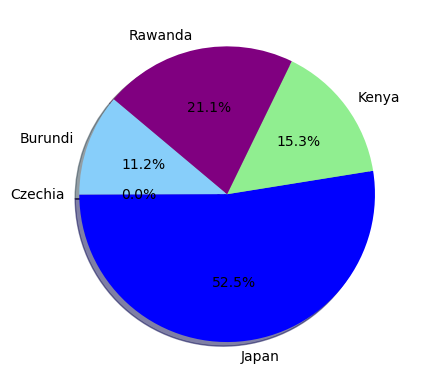

In [21]:
# labels_polnonld = remove_nld.index.values
# print(labels_polnonld)
labels_polnonld_names = ["Burundi", "Czechia", "Japan", "Kenya", "Rawanda"]
colors_pol = ["lightskyblue", "lightcoral", "blue", "lightgreen", "purple"]
pol_nonld = remove_nld["Result"]
plt.pie(pol_nonld, labels=labels_polnonld_names, colors=colors_pol, autopct="%1.1f%%", shadow=True, startangle=140)
plt.show

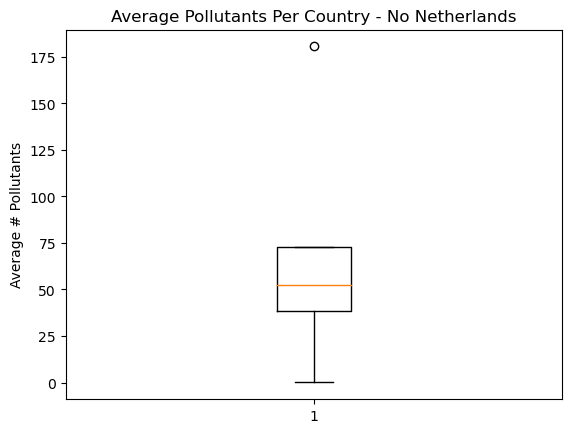

In [22]:
no_nld = average_pollutants[average_pollutants.index != 'NLD']

average_poll_quartiles = [no_nld]
# average_poll_quartiles

fig1, ax1 = plt.subplots()
ax1.set_title('Average Pollutants Per Country - No Netherlands')
ax1.set_ylabel('Average # Pollutants')
ax1.boxplot(average_poll_quartiles)
plt.show()

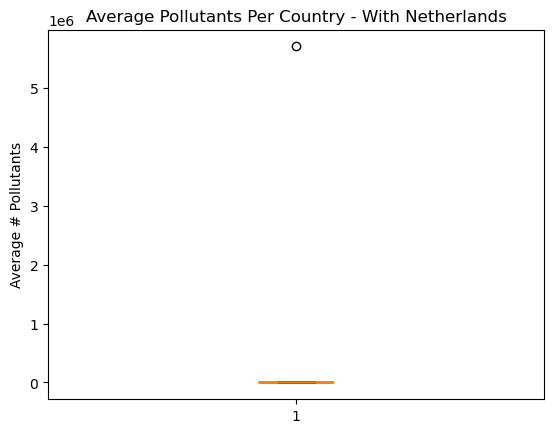

In [23]:
average_poll_quart = [average_pollutants]
# average_poll_quartiles

fig1, ax1 = plt.subplots()
ax1.set_title('Average Pollutants Per Country - With Netherlands')
ax1.set_ylabel('Average # Pollutants')
ax1.boxplot(average_poll_quart)
plt.show()

In [24]:
quartiles_poll = average_pollutants.quantile([.25,.5,.75])
lowerq_poll = quartiles_poll[0.25]
upperq_poll = quartiles_poll[0.75]
iqr_poll = upperq_poll - lowerq_poll
print(f"The lower quartile of Pollutants is: {lowerq_poll}")
print(f"The upper quartile of Pollutants is: {upperq_poll}")
print(f"The interquartile range of pollutants overall is: {iqr_poll}")
print(f"The median pollutants is: {quartiles_poll[0.5]}")

lower_bound_poll = lowerq_poll - (1.5 * iqr_poll)
upper_bound_poll = upperq_poll + (1.5 * iqr_poll)
print(f"Values below {lower_bound_poll} could be outliers.")
print(f"Values above {upper_bound_poll} could be outliers.")

The lower quartile of Pollutants is: 41.94324059275794
The upper quartile of Pollutants is: 153.60187137286155
The interquartile range of pollutants overall is: 111.6586307801036
The median pollutants is: 62.55613942621508
Values below -125.54470557739745 could be outliers.
Values above 321.0898175430169 could be outliers.


In [25]:
quartiles_emis = countries2019.quantile([.25,.5,.75])
lowerq_emis = quartiles_emis[0.25]
upperq_emis = quartiles_emis[0.75]
iqr_emis = upperq_emis - lowerq_emis
print(f"The lower quartile of Emissions is: {lowerq_emis}")
print(f"The upper quartile of Emissions is: {upperq_emis}")
print(f"The interquartile range of Emissions overall is: {iqr_emis}")
print(f"The median Emissions is: {quartiles_emis[0.5]}")

lower_bound_emis = lowerq_emis - (1.5 * iqr_emis)
upper_bound_emis = upperq_emis + (1.5 * iqr_emis)
print(f"Values below {lower_bound_emis} could be outliers.")
print(f"Values above {upper_bound_emis} could be outliers.")

The lower quartile of Emissions is: 0.187025
The upper quartile of Emissions is: 8.515025
The interquartile range of Emissions overall is: 8.328
The median Emissions is: 4.4372
Values below -12.304974999999999 could be outliers.
Values above 21.007025 could be outliers.


In [26]:
# take out those outliers on the top that are skewing the data

nld_info = samples_pollutants.loc[samples_pollutants['Country Code'] == 'NLD']
# nld_info
# nld_sorted = nld_info.sort_values('Result')
# nld_sorted['result_floats'] = nld_sorted['Result'].astype(float)

nld_no_outliers = nld_info.loc[nld_info['Result'] < 1000000]
nld_no_outliers

,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
93418,2014-10-23,00:00,0.5,Ba-Dis,0,0.043000,mg/l,NLD,00016
93419,2014-10-23,00:00,0.5,NO3N,0,0.413000,mg/l,NLD,00016
93420,2014-10-23,00:00,0.5,TP,0,0.240000,mg/l,NLD,00016
93421,2014-10-23,00:00,0.5,Co-Tot,0,0.001000,mg/l,NLD,00016
93422,2014-10-23,00:00,0.5,Mo-Tot,0,0.002000,mg/l,NLD,00016
...,...,...,...,...,...,...,...,...,...
1560679,2016-08-22,12:00,0.3,DEHP,0,1.000000,µg/l,NLD,00427
1560680,2016-09-19,12:00,0.3,DIELDRIN,0,0.000200,µg/l,NLD,00427
1560681,2016-12-12,12:00,0.3,ATRAZINEDESET,0,0.001000,µg/l,NLD,00427
1560682,2016-01-11,12:00,0.3,BHC-delta,0,0.000616,µg/l,NLD,00427


In [27]:
# new average pollutants w/o nld outliers
samples_no_outliers = samples_pollutants.loc[samples_pollutants['Result'] < 1000000]
samples_no_outliers


,Date of Sample,Time of Sample,Depth of Sample,Parameter Tested,Analysis Method,Result,Unit,Country Code,GEMS #
1,2016-04-29,00:00,5.88,TSS,TSS-G,134.000,mg/l,BDI,00002
2,2016-04-29,00:00,5.88,NO2N,COL-AZO,0.036,mg/l,BDI,00002
3,2016-04-29,00:00,5.88,EC,EC-CND-FLD,51.000,µS/cm,BDI,00002
4,2016-04-29,00:00,5.88,TN,COL-AZO-Cd-PS,1.400,mg/l,BDI,00002
5,2016-04-29,00:00,5.88,NH4N,COL-PHE,0.280,mg/l,BDI,00002
...,...,...,...,...,...,...,...,...,...
1561118,2012-05-30,00:00,NaN,TN,COL-AZO-Cd-PS,7.334,mg/l,RWA,00025
1561119,2012-05-30,00:00,NaN,Alk-Tot,0,95.000,mg/l,RWA,00025
1561120,2012-05-30,00:00,NaN,TP,COL-AA-PPS,0.082,mg/l,RWA,00025
1561121,2012-05-30,00:00,NaN,TSS,TSS-G,10.000,mg/l,RWA,00025


              Result
Country Code        
BDI            38.42
CZE             0.02
JPN           180.61
KEN            52.52
NLD            12.94
RWA            72.59


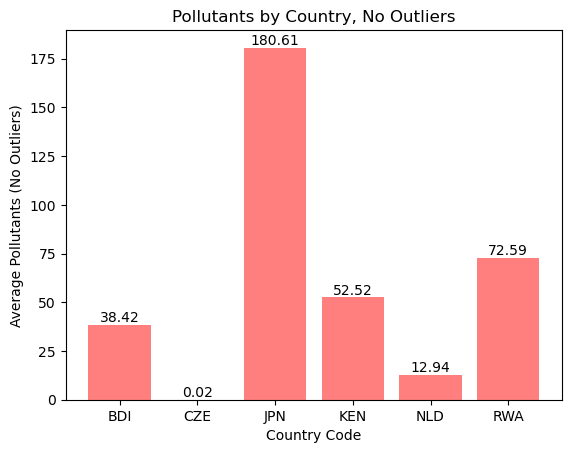

In [36]:
avg_no_outliers = samples_no_outliers.groupby('Country Code')['Result'].mean().round(2)
avg_no_outliers_df = pd.DataFrame(avg_no_outliers)
# avg_no_outliers = avg_no_outliers.rename(columns={avg_no_outliers.columns[1]: 'Results'})
print(avg_no_outliers_df)

# average pollutants, no outliers
x_avgnooutliers = avg_no_outliers_df.index
y_avgnooutliers = avg_no_outliers_df['Result']
plt.bar(x_avgnooutliers, y_avgnooutliers, color='r', alpha=0.5, align='center')

for i,v in enumerate(y_avgnooutliers):
    plt.text(i,v, str(v), ha='center', va='bottom')

plt.title('Pollutants by Country, No Outliers')
plt.xlabel('Country Code')
plt.ylabel('Average Pollutants (No Outliers)')
plt.show()

[Country Code
BDI     38.42
CZE      0.02
JPN    180.61
KEN     52.52
NLD     12.94
RWA     72.59
Name: Result, dtype: float64]


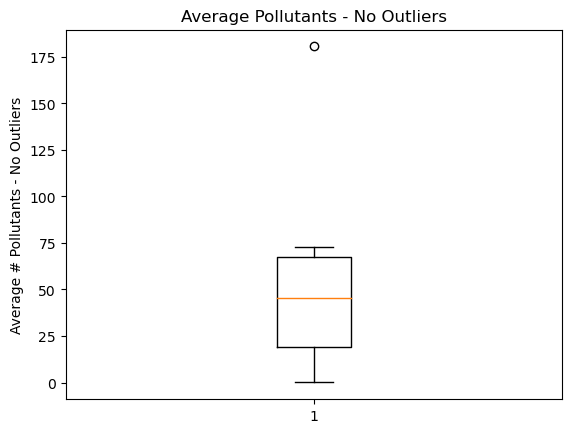

In [41]:
# updated box plots pollution
updated_average_poll_quart = [avg_no_outliers]
print(updated_average_poll_quart)

fig1, ax1 = plt.subplots()
ax1.set_title('Average Pollutants - No Outliers')
ax1.set_ylabel('Average # Pollutants - No Outliers')
ax1.boxplot(updated_average_poll_quart)
plt.show()

[Country Code
BDI     38.416614
CZE      0.023745
JPN    180.606109
KEN     52.523120
RWA     72.589159
Name: Result, dtype: float64]


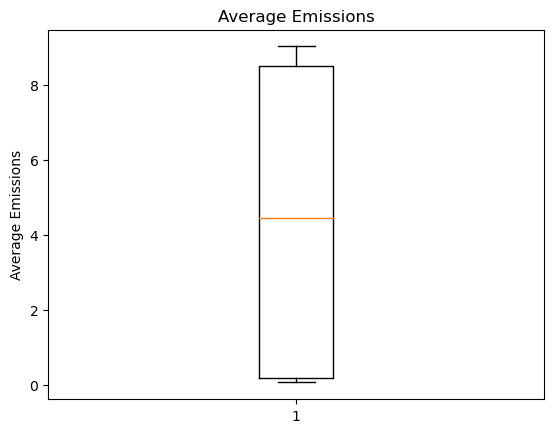

In [42]:
# box plot emissions
emissions_average_quart = [countries2019]
print(average_poll_quartiles)

fig1, ax1 = plt.subplots()
ax1.set_title('Average Emissions')
ax1.set_ylabel('Average Emissions')
ax1.boxplot(emissions_average_quart)
plt.show()

In [45]:
# updated quartiles - pollutants
updated_quartiles_poll = avg_no_outliers.quantile([.25,.5,.75])
updated_lowerq_poll = updated_quartiles_poll[0.25]
updated_upperq_poll = updated_quartiles_poll[0.75]
updated_iqr_pol = updated_upperq_poll - updated_lowerq_poll
print(f"The lower quartile of Pollutants is: {updated_lowerq_poll}")
print(f"The upper quartile of Pollutants is: {updated_upperq_poll}")
print(f"The interquartile range of Pollutants overall is: {updated_iqr_pol}")
print(f"The median Pollutants is: {updated_quartiles_poll[0.5]}")

updated_lower_bound_poll = updated_lowerq_poll - (1.5 * updated_iqr_pol)
updated_upper_bound_poll = updated_upperq_poll + (1.5 * updated_iqr_pol)
print(f"Values below {updated_lower_bound_poll} could be outliers.")
print(f"Values above {updated_upper_bound_poll} could be outliers.")

The lower quartile of Pollutants is: 19.310000000000002
The upper quartile of Pollutants is: 67.5725
The interquartile range of Pollutants overall is: 48.2625
The median Pollutants is: 45.47
Values below -53.08375000000001 could be outliers.
Values above 139.96625 could be outliers.


In [44]:
# updated quartiles - emissions
quartiles_emis = countries2019.quantile([.25,.5,.75])
lowerq_emis = quartiles_emis[0.25]
upperq_emis = quartiles_emis[0.75]
iqr_emis = upperq_emis - lowerq_emis
print(f"The lower quartile of Emissions is: {lowerq_emis}")
print(f"The upper quartile of Emissions is: {upperq_emis}")
print(f"The interquartile range of Emissions overall is: {iqr_emis}")
print(f"The median Emissions is: {quartiles_emis[0.5]}")

lower_bound_emis = lowerq_emis - (1.5 * iqr_emis)
upper_bound_emis = upperq_emis + (1.5 * iqr_emis)
print(f"Values below {lower_bound_emis} could be outliers.")
print(f"Values above {upper_bound_emis} could be outliers.")

The lower quartile of Emissions is: 0.187025
The upper quartile of Emissions is: 8.515025
The interquartile range of Emissions overall is: 8.328
The median Emissions is: 4.4372
Values below -12.304974999999999 could be outliers.
Values above 21.007025 could be outliers.
